In [9]:
#RUN LENGTH ENCODING (RLE) YÖNTEMİ

Veri sıkıştırma yöntemlerinde kullanılan kolay ve etkili bir kayıpsız sıkıştırma algoritmasıdır.
Bu yöntemde amaç kendini tekrar eden veri dizisinin, bu veri dizisinin bir örneği ve kaç kez
tekrarlandığının yan yana yazılarak sıkıştırma yapılmasıdır. Örnek olarak:

BBBDDDDEEFFFFF dizisini
RLE yöntemi ile sıkıştırırsak
3B4D2E5F şeklinde gösterebiliriz.

In [ ]:
#Avantajları
-Tekrar Eden Verilerde Yüksek Sıkıştırma Oranı Sağlaması
-Basit ve Hızlı Olması
-Kayıpsız Sıkıştırma Sağlaması
-Bellek ve Depolama Tasarrufu Sağlaması

In [ ]:
#Dezavantajları
-Tekrar İçermeyen Verilerde (Rassal) Verimsiz Olması
-Renkli ve Karmaşık Görseller İçin Uygun Olmaması
-Kısa Tekrarlar İçeren Verilerde Sıkıştırmanın Verimsiz Olması

In [31]:
#RLE Temel Örnek

In [5]:
Örnek 1
def rle_encode(text):
    encoded = ""
    i = 0
    while i < len(text):
        count = 1
        while i + 1 < len(text) and text[i] == text[i + 1]: # i son karakterdeyse (i+1 dizinin dışına çıkarsa) hata almamak için bu kontrol yapılıyor.
            count += 1
            i += 1
        encoded += str(count) + text[i]
        i += 1
    return encoded

def rle_decode(encoded_text):
    decoded = ""
    i = 0
    while i < len(encoded_text):
        count = int(encoded_text[i])  # Rakamı al
        char = encoded_text[i + 1]    # Karakteri al
        decoded += char * count
        i += 2  # Sonraki sayıya geç
    return decoded

# Örnek Kullanım
text = "AAAABBBCCDAA"
compressed = rle_encode(text)
decompressed = rle_decode(compressed)

print("Orijinal:", text)
print("Sıkıştırılmış:", compressed)
print("Açılmış:", decompressed)


Orijinal: AAAABBBCCDAA
Sıkıştırılmış: 4A3B2C1D2A
Açılmış: AAAABBBCCDAA


In [ ]:
#Tekrar Etmeyen Dizi ile RLE Yöntemi

In [28]:
def rle_encode(text):
    encoded = ""
    i = 0
    while i < len(text):
        count = 1
        while i + 1 < len(text) and text[i] == text[i + 1]:
            count += 1
            i += 1
        encoded += str(count) + text[i]
        i += 1
    return encoded

def rle_decode(encoded_text):
    decoded = ""
    i = 0
    while i < len(encoded_text):
        count = int(encoded_text[i])  # Rakamı al
        char = encoded_text[i + 1]    # Karakteri al
        decoded += char * count
        i += 2  # Sonraki sayıya geç
    return decoded
    
text = "ABCDEFG"
compressed = rle_encode(text)
decompressed = rle_decode(compressed)

print("Orijinal:", text)
print("Sıkıştırılmış:", compressed)
print("Açılmış:", decompressed)


Orijinal: ABCDEFG
Sıkıştırılmış: 1A1B1C1D1E1F1G
Açılmış: ABCDEFG


In [ ]:
#Rakamlar içeren metin

In [33]:
def rle_encode(text):
    encoded = ""
    i = 0
    while i < len(text):
        count = 1
        while i + 1 < len(text) and text[i] == text[i + 1]:
            count += 1
            i += 1
        encoded += str(count) + text[i]
        i += 1
    return encoded

def rle_decode(encoded_text):
    decoded = ""
    i = 0
    while i < len(encoded_text):
        count = int(encoded_text[i])  # Rakamı al
        char = encoded_text[i + 1]    # Karakteri al
        decoded += char * count
        i += 2  # Sonraki sayıya geç
    return decoded
    
text = "111223333"
compressed = rle_encode(text)
decompressed = rle_decode(compressed)

print("Orijinal:", text)
print("Sıkıştırılmış:", compressed)
print("Açılmış:", decompressed)


Orijinal: 111223333
Sıkıştırılmış: 312243
Açılmış: 111223333


In [ ]:
# Renksiz Görsel RLE Yöntemi

Sıkıştırılmış Veri Uzunluğu: 893327
Toplam Fark: 0


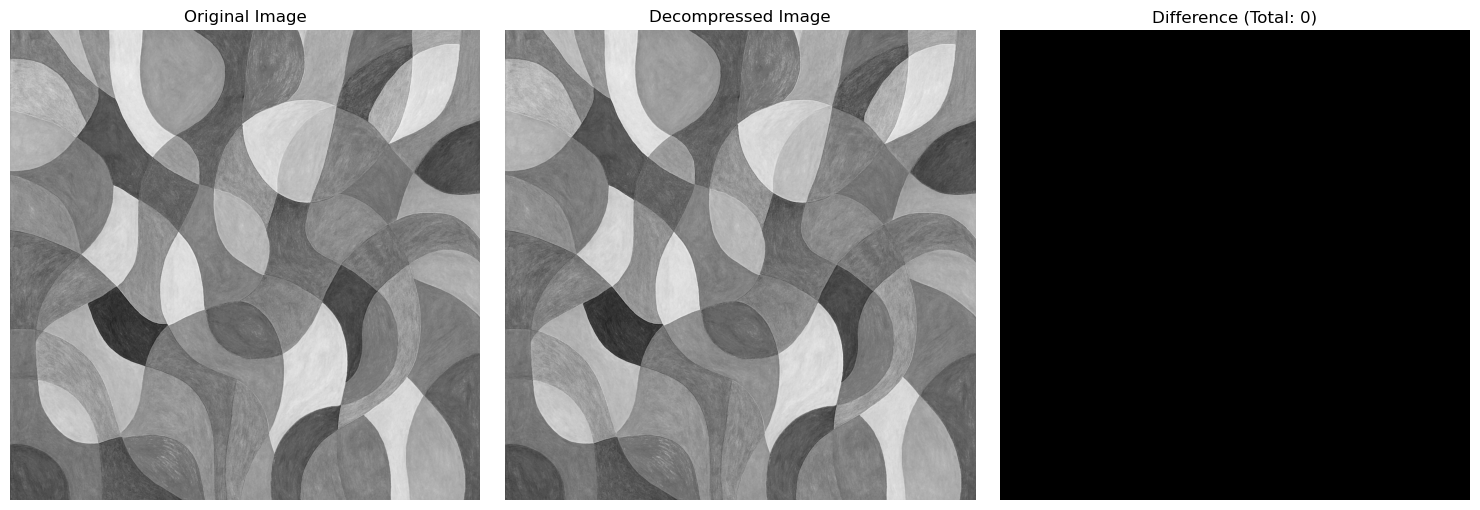

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rle_encode_image(image):
    pixels = image.flatten()
    encoded = []
    prev_pixel = pixels[0]
    count = 1

    for i in range(1, len(pixels)):
        if pixels[i] == prev_pixel:
            count += 1
        else:
            encoded.append((count, prev_pixel))
            prev_pixel = pixels[i]
            count = 1
    encoded.append((count, prev_pixel))
    return encoded

def rle_decode_image(encoded, shape):
    pixels = []
    for count, value in encoded:
        pixels.extend([value] * count)
    return np.array(pixels, dtype=np.uint8).reshape(shape)

# Görseli yükle ve griye çevir
image = cv2.imread("test_image.png", cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Görsel bulunamadı. Lütfen 'test_image.png' dosyasının doğru yerde olduğundan emin olun.")

# Sıkıştırma işlemi
compressed = rle_encode_image(image)
print(f"Sıkıştırılmış Veri Uzunluğu: {len(compressed)}")

# Geri açma işlemi
decompressed = rle_decode_image(compressed, image.shape)

# Farkları hesapla
difference = cv2.absdiff(image, decompressed)
total_difference = np.sum(difference)
print("Toplam Fark:", total_difference)

# Görselleri yan yana göster
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(decompressed, cmap='gray')
axs[1].set_title('Decompressed Image')
axs[1].axis('off')

axs[2].imshow(difference, cmap='gray')
axs[2].set_title(f'Difference (Total: {total_difference})')
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Renkli Görsel RLE Yöntemi

Sıkıştırılmış Veri Uzunluğu: 1041486
Toplam Fark: 0


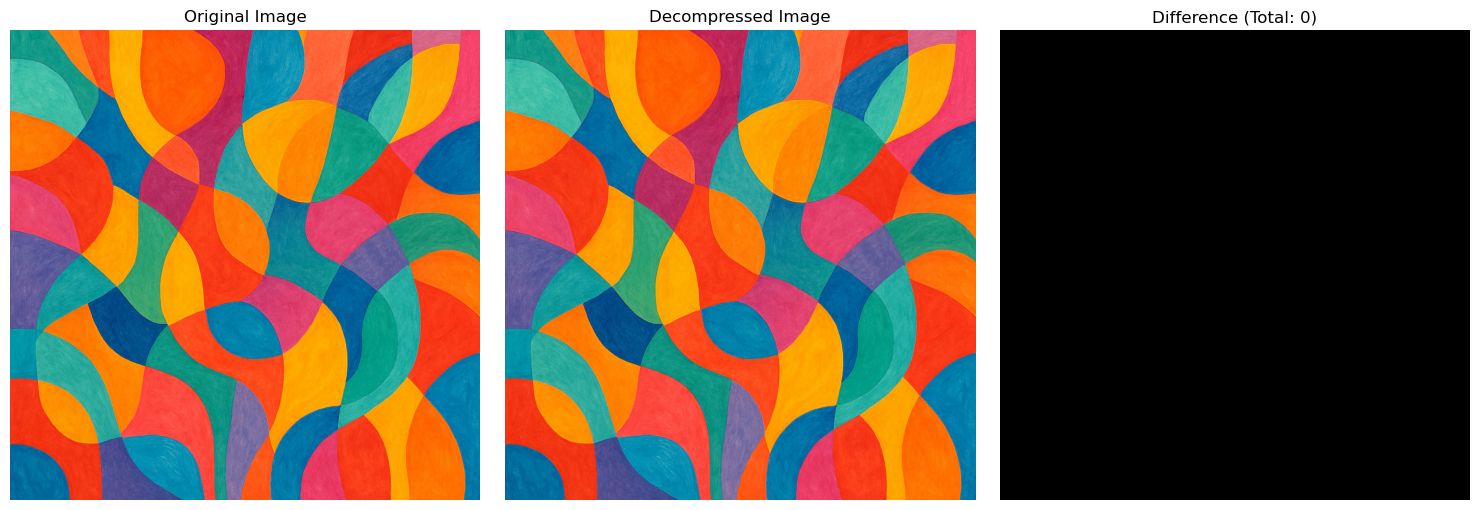

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rle_encode_color_image(image):
    """Renkli görseli RLE ile sıkıştırır."""
    pixels = image.reshape(-1, 3) 
    # Her piksel 3 değerden oluşuyor, image 3 boyutlu 2 boyutlu hale getiriyoruz.(RGB)-Görseli 2D hale getirip, pikselleri sırayla kolayca işlemek.
    encoded = []
    prev_pixel = pixels[0]
    count = 1

    for i in range(1, len(pixels)):
        if np.array_equal(pixels[i], prev_pixel):
            count += 1
        else:
            encoded.append((count, prev_pixel.copy()))
            prev_pixel = pixels[i]
            count = 1
    encoded.append((count, prev_pixel.copy()))
    return encoded

def rle_decode_color_image(encoded, shape):
    """Renkli görseli RLE'den geri açar."""
    pixels = []
    for count, value in encoded:
        pixels.extend([value] * count) #extend fonksiyonu listeye birçok elemanı eklemek için kullanılır.
    return np.array(pixels, dtype=np.uint8).reshape(shape)

# Görseli yükle (renkli olarak)
image = cv2.imread("test_image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV BGR okur, RGB'ye çeviriyoruz

if image is None:
    raise FileNotFoundError("Görsel bulunamadı. Lütfen 'test_image.png' dosyasının doğru yerde olduğundan emin olun.")

# Sıkıştırma işlemi
compressed = rle_encode_color_image(image)
print(f"Sıkıştırılmış Veri Uzunluğu: {len(compressed)}") #Ardışık aynı renkte olan piksel gruplarının toplam sayısını verir.

# Geri açma işlemi
decompressed = rle_decode_color_image(compressed, image.shape)

# Farkları hesapla
difference = cv2.absdiff(image, decompressed) #iki görüntü arasındaki mutlak farkı piksel piksel hesaplar.
total_difference = np.sum(difference)
print("Toplam Fark:", total_difference)

# Görselleri yan yana göster
fig, axs = plt.subplots(1, 3, figsize=(15, 5)) #1 satırda 3 sütun olacak. 15 g, 5 y

axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(decompressed)
axs[1].set_title('Decompressed Image')
axs[1].axis('off')

axs[2].imshow(difference)
axs[2].set_title(f'Difference (Total: {total_difference})')
axs[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Renkli- Renksiz Görsel Karşılaştırması

Gri Görsel:
  Orijinal Veri Boyutu: 1048576 birim
  Sıkıştırılmış Veri Boyutu: 1786654 birim
  Sıkıştırma Oranı: %170.39

Renkli Görsel:
  Orijinal Veri Boyutu: 3145728 birim
  Sıkıştırılmış Veri Boyutu: 4165944 birim
  Sıkıştırma Oranı: %132.43


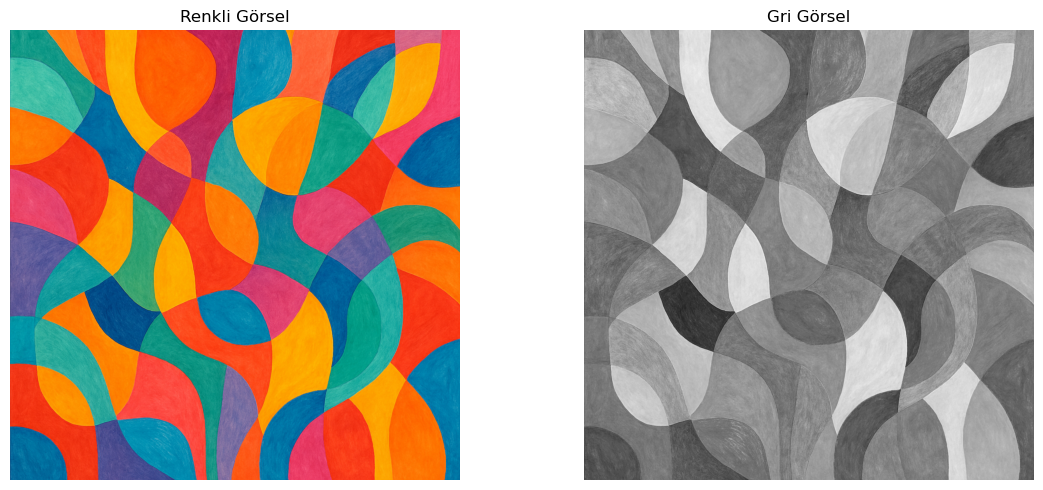

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- RLE Fonksiyonları ---
def rle_encode_image(pixels):
    encoded = []
    prev_pixel = pixels[0]
    count = 1

    for i in range(1, len(pixels)):
        if np.array_equal(pixels[i], prev_pixel):
            count += 1
        else:
            encoded.append((count, prev_pixel))
            prev_pixel = pixels[i]
            count = 1
    encoded.append((count, prev_pixel))
    return encoded

# --- Ana Program ---
# Görseli oku (hem gri hem renkli)
color_image = cv2.imread("test_image.png")  # Renkli (BGR)
gray_image = cv2.imread("test_image.png", cv2.IMREAD_GRAYSCALE)  # Gri tonlu

if color_image is None or gray_image is None:
    raise FileNotFoundError("Görsel bulunamadı. 'test_image.png' doğru konumda mı?")

# Görselleri düzleştir
gray_pixels = gray_image.flatten() 
color_pixels = color_image.reshape(-1, 3)  # (satır, sütun, kanal) -> (satır*sütun, 3) Renkli görselin piksellerini 3 değerli satırlara çevirir. (Her pikselin 3 değeri vardır: kırmızı, yeşil, mavi.)

# RLE ile sıkıştır
gray_encoded = rle_encode_image(gray_pixels) #Gri ölçekli görselin piksellerini tek boyutlu bir diziye çevirir. (Her pikselin sadece bir değeri vardır: yoğunluk.)

color_encoded = rle_encode_image(color_pixels) 

# Sıkıştırma oranı hesapla
gray_original_size = gray_pixels.size  # Orijinal piksel sayısı
gray_compressed_size = len(gray_encoded) * 2  # (count, value) çifti olduğu için 2 ile çarpıyoruz

color_original_size = color_pixels.shape[0] * 3  # Her piksel 3 kanal içeriyor (R,G,B)
color_compressed_size = len(color_encoded) * (1 + 3)  # (count + R,G,B) toplam 4 değer

#Renkli görselde her pikselin 3 değer (RGB) içerdiği için, piksel sayısını almak için shape[0] kullanıyoruz. Bu bize tek boyutlu dizi oluşturduğumuzda kaç piksel olduğunu gösterir.

#Gri görselde ise her pikselin sadece bir değeri olduğundan, bu tek boyutlu diziyi flatten ile elde ettiğimizde, toplam piksel sayısını size ile buluyoruz.

gray_compression_ratio = (gray_compressed_size / gray_original_size) * 100
color_compression_ratio = (color_compressed_size / color_original_size) * 100

# Sonuçları yazdır
print("Gri Görsel:")
print(f"  Orijinal Veri Boyutu: {gray_original_size} birim")
print(f"  Sıkıştırılmış Veri Boyutu: {gray_compressed_size} birim")
print(f"  Sıkıştırma Oranı: %{gray_compression_ratio:.2f}")

print("\nRenkli Görsel:")
print(f"  Orijinal Veri Boyutu: {color_original_size} birim")
print(f"  Sıkıştırılmış Veri Boyutu: {color_compressed_size} birim")
print(f"  Sıkıştırma Oranı: %{color_compression_ratio:.2f}")

# Görselleri yan yana göster
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Renkli Görsel')
axs[0].axis('off')

axs[1].imshow(gray_image, cmap='gray')
axs[1].set_title('Gri Görsel')
axs[1].axis('off')

plt.tight_layout()
plt.show()
